## Assigment: Neural network basics

Soft deadline: 16.09.18 at 23.59

Hard deadline: 18.09.18 at 23.59

For this task I intentionally provide no boilerplate code, because very puprpose of this task is getting you comforatable with basic code template for desiging NNs in pytorch. I higly recommend you to revisit all the last seminar materials.

#### Task

* Implement simple **fully-convolutional** neural architecture for classification. Make sure it is small enought to run on your home machine.
* Provide dataset visulization.
* Provide train/test split and validation

#### Requirements

* Architecture should derive from `torch.nn.Module`
* Use `torch.utils.data.Dataset` and `torch.utils.data.DataLoader`. But if you manage co simplify this step using dataset `torchivision`, I will only encourage you.
* Implement at least one data transformer, but make sure it is useful for classification task.
* Use FashionMNIST dataset https://github.com/zalandoresearch/fashion-mnist
* Make sure you can fix random seed for all components of your code to make experiments reproducible
* Since you architecure should be fully-convolutional, make sure it does not depend on input size.

In [1]:
%matplotlib inline

#TODO

import matplotlib.pyplot as plt
from IPython import display

import itertools
import random
import time

import numpy

import torch
import torch.nn as nn

import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torch.nn import Module, ReLU, MaxPool2d, Conv2d, Linear, CrossEntropyLoss


torch.manual_seed(566)
random.seed(566)

In [2]:
data_transform = Compose([ToTensor(), Normalize((0.5,), (0.5,))])
workspace = 'workspace'
origin = FashionMNIST(workspace, download=True, transform=ToTensor())
train = FashionMNIST(workspace, download=True, transform=data_transform)
test = FashionMNIST(workspace, train=False, download=True, transform=data_transform)


Classes representers:


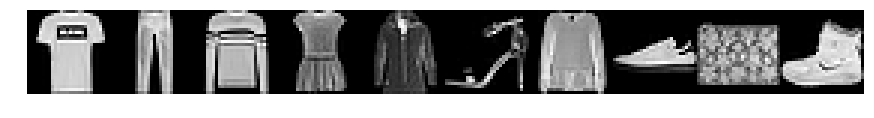

In [3]:
def draw_images(images):
    fig, ax = plt.subplots(figsize=(15, 15))
    plt.axis('off')
    numpy_images = numpy.concatenate([image.numpy().reshape(28, 28).T for image in images]).T
    ax.imshow(numpy_images, cmap='gray', interpolation='nearest')

def show_representers():
    samples = DataLoader(dataset=origin, batch_size=1000)
    representers = {}
    images, labels = iter(samples).next()
    for image, label in zip(images, labels):
        if label.item() not in representers.keys():
            representers[label.item()] = image
    print("Classes representers:")
    draw_images([representers[i] for i in sorted(representers.keys())])
    
show_representers()

In [4]:
class MyOwnCNN(torch.nn.Module):
    def __init__(self):
        super(MyOwnCNN, self).__init__()

        self.convolution_layers = nn.Sequential(
            Conv2d(1, 3, 5, padding=2),
            ReLU(),
            MaxPool2d(2),
            Conv2d(3, 5, 5, padding=2),
            ReLU(),
            MaxPool2d(2))
        self.linear_layers = nn.Sequential(
            Linear(7 * 7 * 5, 64),
            ReLU(),
            Linear(64, 10))

    def forward(self, x):
        x = self.convolution_layers(x)
        x = x.view(-1, 7 * 7 * 5)
        x = self.linear_layers(x)
        return x

In [5]:
def train_classifier(classifier, loss_function, steps, batch, lr, train, test):
    batch_loader = DataLoader(train, batch_size=batch, shuffle=True)
    train_loader = DataLoader(train, batch_size=len(train))
    test_loader = DataLoader(test, batch_size=len(test))
    
    
    train_features, train_marks = iter(train_loader).next()
    test_features, test_marks = iter(test_loader).next()
    
    optimizer = torch.optim.Adam(classifier.parameters(), lr=lr)
    
    train_loss = []
    test_loss = []

    for step in range(steps):
        for features, marks in batch_loader:
            optimizer.zero_grad()
            predictions = classifier(features)
            loss_value = loss_function(predictions, marks)
            loss_value.backward()
            optimizer.step()
            
        with torch.no_grad():
            train_loss.append(loss_function(classifier(train_features), train_marks).item())
            test_loss.append(loss_function(classifier(test_features), test_marks).item())
        print("Step #", step, ", train loss=", train_loss[-1], ", test_loss=", test_loss[-1], sep='')

    return train_loss, test_loss
    
train_log, test_log = train_classifier(MyOwnCNN(), CrossEntropyLoss(), 20, 100, 0.001, train, test)

Step #0, train loss=0.5228245258331299, test_loss=0.550186812877655
Step #1, train loss=0.42156508564949036, test_loss=0.4468260109424591
Step #2, train loss=0.37381160259246826, test_loss=0.40215742588043213
Step #3, train loss=0.35496461391448975, test_loss=0.3876243531703949
Step #4, train loss=0.3540804088115692, test_loss=0.38834601640701294
Step #5, train loss=0.3259445130825043, test_loss=0.3625193238258362
Step #6, train loss=0.3090883195400238, test_loss=0.3490198850631714
Step #7, train loss=0.3075410723686218, test_loss=0.34851521253585815
Step #8, train loss=0.2907218933105469, test_loss=0.3340485692024231
Step #9, train loss=0.28623199462890625, test_loss=0.33069321513175964
Step #10, train loss=0.2960904538631439, test_loss=0.34574440121650696
Step #11, train loss=0.27813225984573364, test_loss=0.3249380588531494
Step #12, train loss=0.26752805709838867, test_loss=0.31810328364372253
Step #13, train loss=0.26488763093948364, test_loss=0.31867533922195435
Step #14, train l

In [9]:
def show_plot(values):
    plt.clf()
    plt.plot(values, label="loss")
    plt.legend()
    plt.show()

# График функции потерь на обучающей выборке

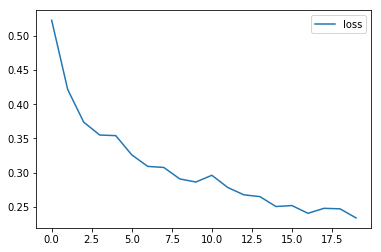

In [10]:
show_plot(train_log)

# График функции потерь на тестовой выборке

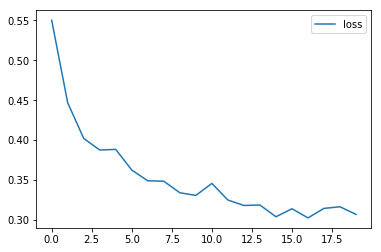

In [11]:
show_plot(test_log)